In [36]:
#Import Libraries
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline
import matplotlib.pyplot as plt

In [1]:
#Change directory to the local directory where the commit_activity CSV data is stored
import os
os.chdir('/Users/spenmets/Google Drive/Personal/r2i/FP/hf/ND/')

In [144]:
#Import data in to pandas dataframe
data = pd.read_csv("d3_commit_activity.csv")
data_hourly=pd.read_csv("d3_commit_activity_hourly.csv")
#Change timestamp column to readable date
data['week']=pd.to_datetime(data['week'],unit='s')
#change the column headings
data.columns=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Total_Count','Week']
data_hourly.columns=['Day','Hour','Commits']
print data.head()
print data_hourly.head()

   Sunday  Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  \
0       0       0        0          0         0       0         0   
1       0       0        0          0         0       0         0   
2       0       0        0          0         0       0         0   
3       0       0        0          0         0       0         0   
4       0       0        0          0         0       2         0   

   Total_Count       Week  
0            0 2015-05-31  
1            0 2015-06-07  
2            0 2015-06-14  
3            0 2015-06-21  
4            2 2015-06-28  
   Day  Hour  Commits
0    0     0        7
1    0     1        0
2    0     2        1
3    0     3        0
4    0     4        0


In [129]:
#Converted dataframe in to timeseries data
ts = data.set_index('Week')

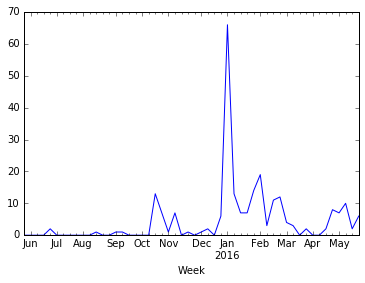

In [48]:
#simple plot to see the commit data
ts['Total_Count'].plot()
#From the plot it looks like the 2nd or 3rd week of Jan has the highest number of total commits

In [57]:
#Find the Week which has the maximum commit activity
print ts['Total_Count'].idxmax()
print ts['Total_Count'].max()

#The week of Jan 3rd 2016 has the maximum commit activity of 66

2016-01-03 00:00:00
66


In [54]:
#To see the statistics of each column
ts.describe()
#It is clear that Tuesday has the maximum number of commits

,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Total_Count
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,0.673077,0.923077,1.000000,0.826923,0.711538,0.192308,4.596154
std,0.972472,1.478223,4.854132,1.889081,2.064843,1.210032,0.767948,9.860318
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.250000,0.000000,1.250000,0.000000,1.000000,0.000000,7.000000
max,6.000000,6.000000,35.000000,9.000000,11.000000,5.000000,5.000000,66.000000


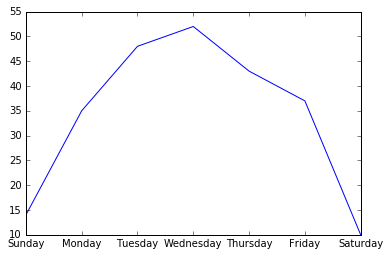

In [142]:
count_by_day=ts.sum()[0:7]
count_by_day.plot()
#It appears that Wednesday has the maximum number of commits overall

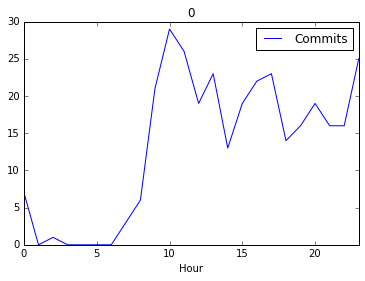

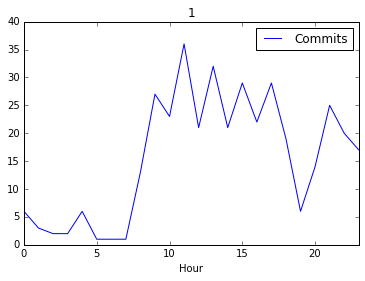

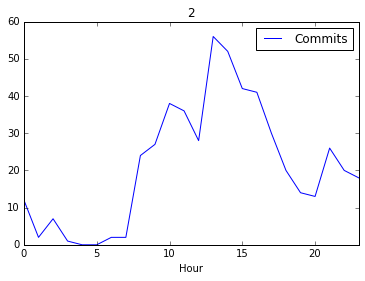

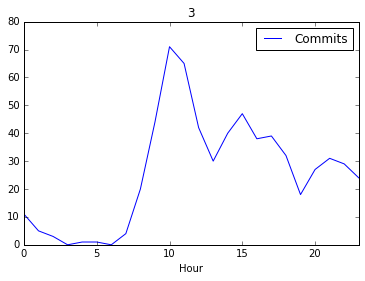

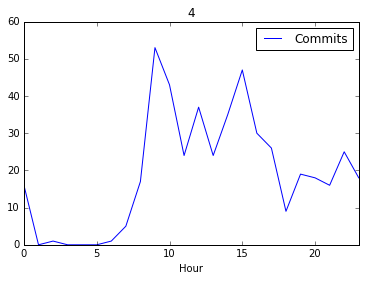

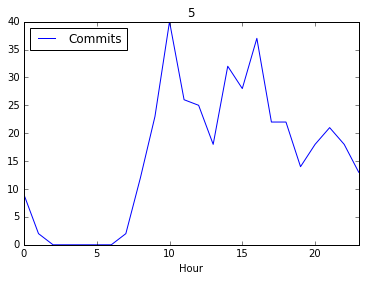

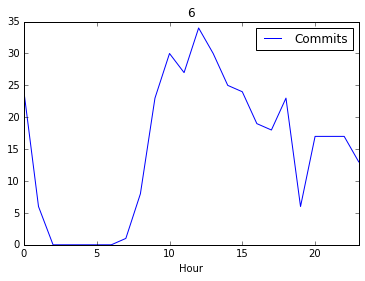

In [148]:
#Plots for commits for each hour by day
for i, group in data_hourly.groupby('Day'):
    plt.figure()
    group.plot(x='Hour', y='Commits', title=str(i))